In [42]:
# Auto Reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Import Modules
import csv
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import json
from pprint import pprint
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from math import log
import re
import os
from gensim import corpora
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec
from wordcloud import WordCloud

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis


# NLTK Modules
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import chunk
from nltk.util import ngrams

# Import Custom Modules
from src.data_cleaner import *
from src.dummy_words import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [44]:
# Import Data
# clean_df = pd.read_pickle('data/clean_data.pkl')
clean_df = pd.read_pickle('data/all_clean_data.pkl')
# Rid Period from clean text
clean_df['clean_text'] = clean_df['clean_text'].apply(lambda x: "".join(x.split(".")))
# clean_df['clean_text'][0]

In [45]:
# See Current Features
# clean_df.columns
clean_df.head(2)

,song,artist,featured,rank,year,lyrics,lyrics_state,song_id,lyrics_owner_id,primary_artist_url,clean_text,sentences,tokens,tokens_stop,token_set
0,Thrift Shop,Macklemore & Ryan Lewis,NaN,1,2013,"[hey macklemore can we go thrift shopping, wha...",True,86538,3928,https://genius.com/artists/Macklemore-and-ryan...,hey macklemore can we go thrift shopping what ...,[hey macklemore can we go thrift shopping what...,"[hey, macklemore, can, we, go, thrift, shoppin...","[hey, macklemore, go, thrift, shopping, bada, ...","[da, ask, jammies, what, lookin, wolf, coppin,..."
1,Can't Hold Us,Macklemore & Ryan Lewis,NaN,2,2013,"[hey hey hey, good to see you, come on dude le...",True,57234,37383,https://genius.com/artists/Macklemore-and-ryan...,hey hey hey good to see you come on dude lets ...,[hey hey hey good to see you come on dude lets...,"[hey, hey, hey, good, to, see, you, come, on, ...","[hey, hey, hey, good, see, come, dude, lets, g...","[pounds, gone, humble, humility, what, city, g..."


# Text Mining Algorithms

### Vectorizing: Term Frequency-Inverse Document Frequency (TF-IDF)

> #### Getting TERM FREQUENCY
The number of times a term occurs in a specific document: 

$tf(term,document) = \frac{\# \ of \ times \ a \ term \ appears \ in \ a \ document}{\#\ of\ terms\ in\ the\ document|}$

In [46]:
# Add Features to DataFrame of Term Occurences
clean_df['term_occurences'] = clean_df['tokens'].apply(lambda x: Counter(x))
# clean_df['term_occurences'][0]

Deciding to use the tokens where the stop-words were NOT filtered out

In [47]:
# Add Features to DataFrame of Term Frequency
clean_df['term_frequency'] = [{k: (v / float(len(clean_df['tokens'].iloc[i])))
                       for k, v in clean_df['term_occurences'].iloc[i].items()} for i in range(len(clean_df['term_occurences']))]
# clean_df['term_frequency'][0]

> #### Getting DOCUMENT FREQUENCY

$df(term,corpus) = \frac{ \# \ of \ documents \ that \ contain \ a \ term}{ \# \ of \ documents \ in \ the \ corpus}$


In [48]:
# Add Features to DataFrame of Doc Occurences
doc_occ = Counter([word for bow in clean_df['tokens'] for word in set(bow)])
# doc_occ

In [49]:
# Add Features to DataFrame of Term Frequency
doc_freq =  {k: (v / float(len(clean_df['tokens'])))
            for k, v in doc_occ.items()}
# doc_freq

> #### TFIDF vector

$df(term,corpus) = \frac{ \# \ of \ documents \ that \ contain \ a \ term}{ \# \ of \ documents \ in \ the \ corpus}$

The inverse document frequency is defined in terms of the document frequency as

$idf(term,corpus) = \log{\frac{1}{df(term,corpus)}}$.

TF-IDF is an acronym for the product of two parts: the term frequency tf and what is called the inverse document frequency idf. The term frequency is just the counts in a term frequency vector. 

tf-idf $ = tf(term,document) * idf(term,corpus)$

In [50]:
tf_vectorizer = TfidfVectorizer()
vec = tf_vectorizer.fit_transform(clean_df['clean_text'])
vector_df_tf = pd.DataFrame(vec.toarray().transpose(),
                         index=tf_vectorizer.get_feature_names())
vector_df_tf

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zucker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuehlsdofrff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Testing Count Vectorizer

In [51]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform(clean_df['clean_text'])
vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                         index=count_vec.get_feature_names())
vector_df_cnt

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
00000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zucker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuehlsdofrff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TOPIC MODELING

In [52]:
# Create Corpus
corpus = clean_df['clean_text'].tolist()
tokens = [word_tokenize(doc) for doc in corpus]
tokens_stop = clean_df['tokens_stop'].tolist() 


In [53]:
# Create Yearly Corpus
grouped = clean_df.groupby('year')

# group_2019 = clean_df.iloc[grouped.groups[2019]].copy()
# group_2018 = clean_df.iloc[grouped.groups[2018]].copy()
# group_2017 = clean_df.iloc[grouped.groups[2017]].copy()
# group_2016 = clean_df.iloc[grouped.groups[2016]].copy()
# group_2015 = clean_df.iloc[grouped.groups[2015]].copy()
# group_list = [group_2015, group_2016, group_2017, group_2018, group_2019]
group_list = [clean_df.iloc[grouped.groups[year]].copy() for year in range(2013, 2020)]

In [54]:
corpus[0][:100], tokens[0][:5], tokens_stop[0][:5]

('hey macklemore can we go thrift shopping what what what what what what what what what what what what',
 ['hey', 'macklemore', 'can', 'we', 'go'],
 ['hey', 'macklemore', 'go', 'thrift', 'shopping'])

## Looking at words by Year

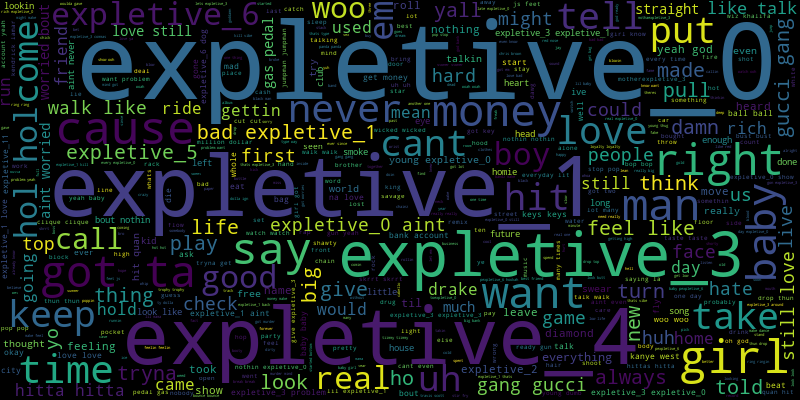

In [55]:
stops = ['im', 'thats', 'ya', 'though', 'yeah']
custom_stop = ['yeah', 'like', 'got', '2018', 'know', 'get', 'aint', 'ayy', 'go', 'na', 'back', 'one', 'gon', 'make', 'wan', 'thats', 'need', 'oh', 'see', 'feat', 'ooh', 'said', 'way', "2017", "la", 'lets', 'ft', 'let', 'hey', 'ima', 'uoeno', 'oohoohoohooh', 'ah', 'js', 'pare'] + stops
# Join the different processed titles together
long_string = ','.join([",".join(tokens) for tokens in tokens_stop])

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3,  width=800, height=400, stopwords=custom_stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Plot Most Common Words from CounterVectorizer

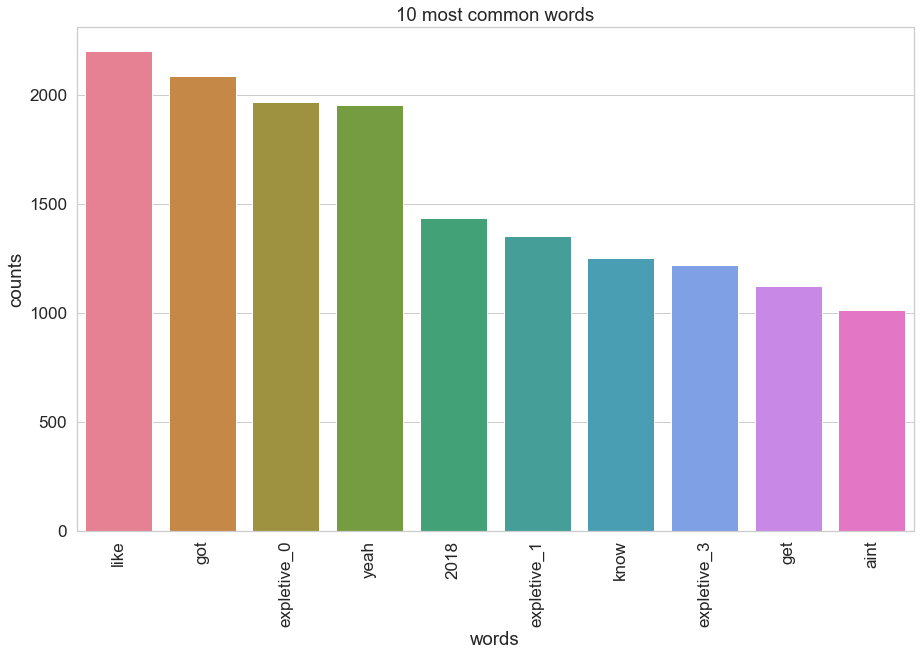

In [56]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform([" ".join(set_) for set_ in clean_df['tokens_stop']])
vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                         index=count_vec.get_feature_names())

# Visualise the 10 most common words
plot_10_most_common_words(vec, count_vec)

### Plot again after removing custom stop words (yeah, like, got, 2018, know, get, aint)

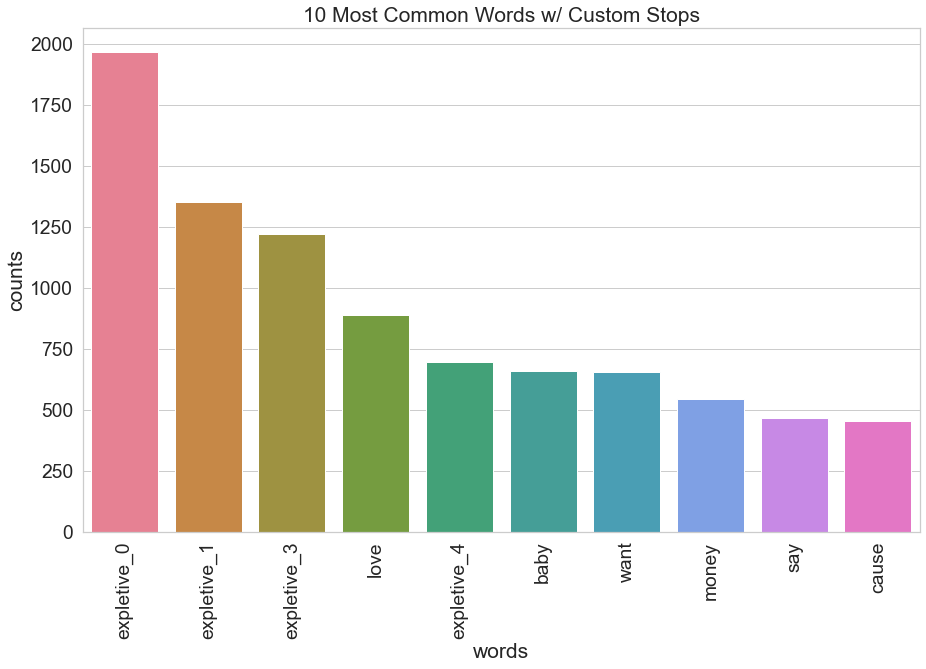

In [57]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in clean_df['tokens_stop']])
vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                         index=count_vec.get_feature_names())

# Visualise the 10 most common words
plot_10_most_common_words(vec, count_vec, '10 Most Common Words w/ Custom Stops')

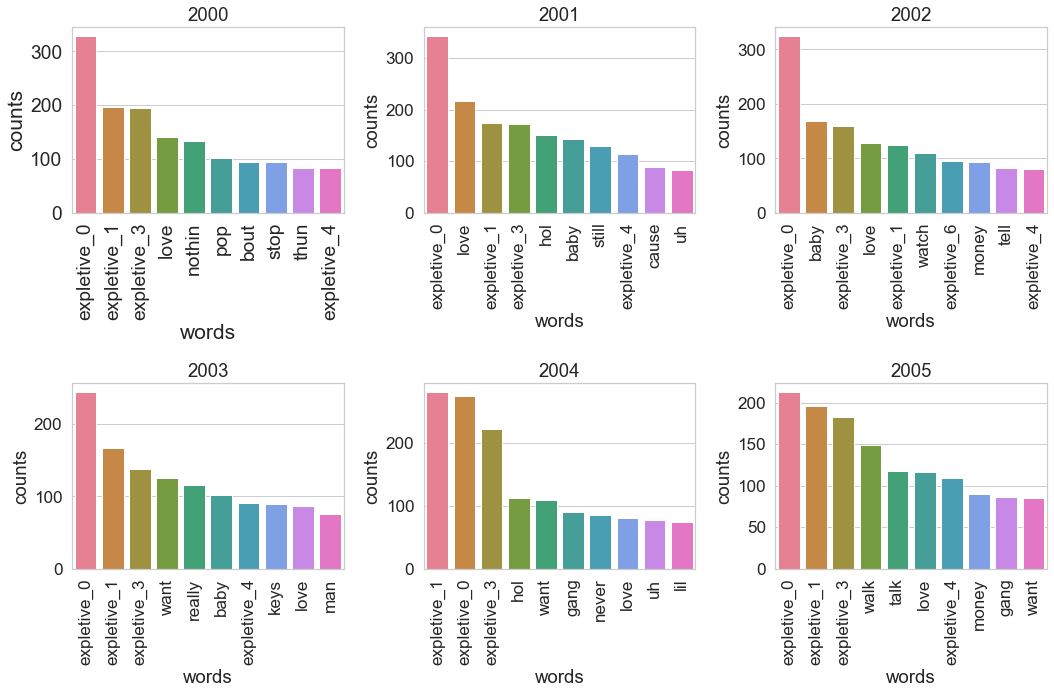

In [58]:
fig = plt.figure(figsize=(15, 10))

for year, group, i in zip(range(2000, 2006), group_list[:6], range(1,7)):
    count_vec = CountVectorizer()
    vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in group['tokens_stop']])
    vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                             index=count_vec.get_feature_names())
    words = count_vec.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in vec:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    fig.add_subplot(2, 3, i)
    sns.set_context("notebook", font_scale=1.55, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.title(year)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')

fig.tight_layout()

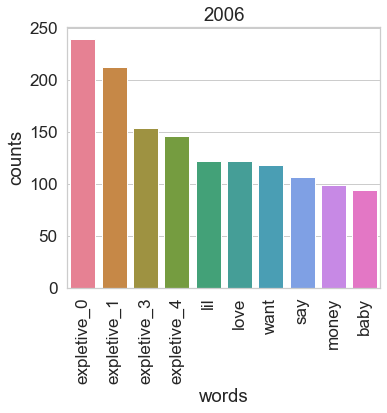

In [59]:
fig = plt.figure(figsize=(15, 10))

for year, group, i in zip(range(2006, 2012), group_list[6:12], range(1,7)):
    count_vec = CountVectorizer()
    vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in group['tokens_stop']])
    vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                             index=count_vec.get_feature_names())
    words = count_vec.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in vec:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    fig.add_subplot(2, 3, i)
    sns.set_context("notebook", font_scale=1.55, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.title(year)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')

fig.tight_layout()

In [60]:
fig = plt.figure(figsize=(15, 10))

for year, group, i in zip(range(2012, 2018), group_list[12:18], range(1,7)):
    count_vec = CountVectorizer()
    vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in group['tokens_stop']])
    vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                             index=count_vec.get_feature_names())
    words = count_vec.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in vec:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    fig.add_subplot(2, 3, i)
    sns.set_context("notebook", font_scale=1.55, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.title(year)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')

fig.tight_layout()

<Figure size 1080x720 with 0 Axes>

In [61]:
fig = plt.figure(figsize=(15, 10))

for year, group, i in zip(range(2018, 2020), group_list[18:], range(1,7)):
    count_vec = CountVectorizer()
    vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in group['tokens_stop']])
    vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                             index=count_vec.get_feature_names())
    words = count_vec.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in vec:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    fig.add_subplot(2, 3, i)
    sns.set_context("notebook", font_scale=1.55, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.title(year)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')

fig.tight_layout()

<Figure size 1080x720 with 0 Axes>

## LDA Latent Dirichlet Allocation

### 2013-2019 Topics via LDA

In [62]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in clean_df['tokens_stop']])

# Tweak the two parameters below (use int values below 15)
number_topics = 7
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [63]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
expletive_0 expletive_3 expletive_1 expletive_4 want baby expletive_6 really real money man say em cause god

Topic #1:
expletive_0 expletive_1 watch baby vibe thun drop beat girl gas love feel pedal lil expletive_4

Topic #2:
love hitta expletive_0 nothin expletive_1 gucci gang baby keys hittas ball bout worried expletive_3 think

Topic #3:
hol expletive_1 pop jumpman stop want ring expletive_3 feel mediocre rollie love stoner woo think

Topic #4:
love expletive_0 expletive_3 want expletive_1 walk ta baby girl talk tell expletive_4 money woo life

Topic #5:
lil drake cardi remix young love 2016 aap west kanye future clique brown baby red

Topic #6:
expletive_0 expletive_1 expletive_3 uh expletive_4 hit want money say cause look bad time cut better


### Use pyLDAvis to see results

In [64]:
# %%time

# # Visualize the topics
# pyLDAvis.enable_notebook()

# LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

# LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

In [65]:
# # Write to File
# pyLDAvis.save_html(LDAvis_prepared, 'docs/lda.html')

In [66]:
# LDAvis_prepared

# LDA Revised with removing ALL Expletives

In [67]:
# Custom Function to remove expletives
def match_expletive(item:str):
    """Replaces expletive with empty string"""
    item = re.sub(r'(expleti*)(.*?)\b', '', item)
    return item
# New Stops
stop_words = set(stopwords.words('english'))
stops = [
'im', 'thats', 'ya', 'though', 'yeah', 'like', 'got', '2018', 'know', 'get', 'aint', 
'ayy', 'go', 'na', 'back', 'one', 'gon', 'make', 
'wan', 'thats', 'need', 'oh', 'see', 'feat', 'ooh', 'said', 'way', "2017", 
"la", 'lets', 'ft', 'let', 'hey', 'ima', 'uoeno', 'oohoohoohooh', 'ah', 'js', 
'pare', 'yuh', 'what', 'bada', 'doo', 'da', 'that', 'ill', 'alllanggahmollah', 'yo', 
'2018april', '2018june', '2018july', '2016', '2015'] + re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", " ".join(stop_words)).split()



clean_stop_tokens = clean_df['lyrics'].apply(lambda x: " ".join([i.strip() for i in x if i]))
clean_stop_tokens = list(map(lambda x: (match_dummies(x, False).split()), clean_stop_tokens))

In [82]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform([" ".join([x for x in set_ if x not in stops]) for set_ in clean_stop_tokens])

# Tweak the two parameters below (use int values below 15)
number_topics = 15
number_words = 20

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

<350x12900 sparse matrix of type '<class 'numpy.int64'>'
	with 48562 stored elements in Compressed Sparse Row format>

In [69]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
walk talk gotta lot times want twerk dance bandz love break lil tell cabello moves good time man hit came

Topic #1:
feel thun drop stoner time type wanna want love tell good plug say wait man cause look girl hate face

Topic #2:
gang watch gucci cut cardi whip hot bop nae brr wrist kitchen 21 stir cartier fry huh chain woo nah

Topic #3:
dog maybe jesus beat say ride huh tried tryna want wanna leave cause baby skrrt time feed run gotta came

Topic #4:
hitta hittas look love wicked drake kanye west want panda future tap butt lil hours remix good dj dm girl

Topic #5:
baby girl right say better cause think tell want wanna turn crazy gave tryna man hit time looking come friends

Topic #6:
keys love feet woo lil different mask coco come clout big brown chase good savage talk ye bad time aap

Topic #7:
wanna bust taste goin time right real want mediocre better really timber cause rake big end tell love round come

Topic #8:
gas pedal tiimmy want new swear w

In [70]:
%%time

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

Wall time: 9min 40s


c:\users\wesle\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [71]:
# Write to File
pyLDAvis.save_html(LDAvis_prepared, 'docs/post_lda.html')

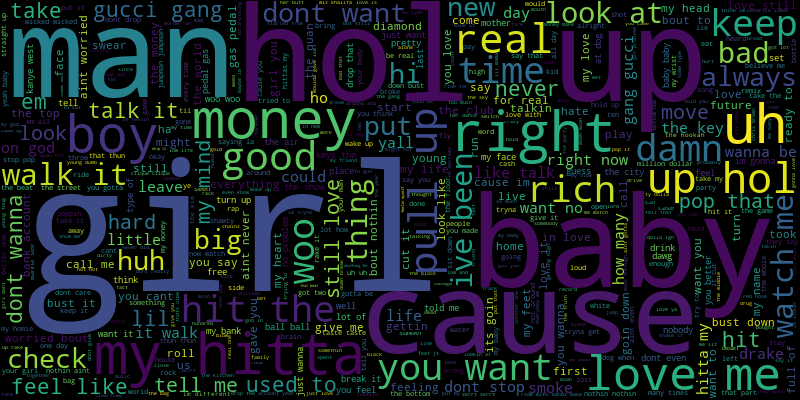

In [72]:
# Join the different processed titles together
long_string = ','.join([",".join(x) for x in clean_stop_tokens])

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3,  width=800, height=400, stopwords=stops)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Word Cloud by Year

#### 2013

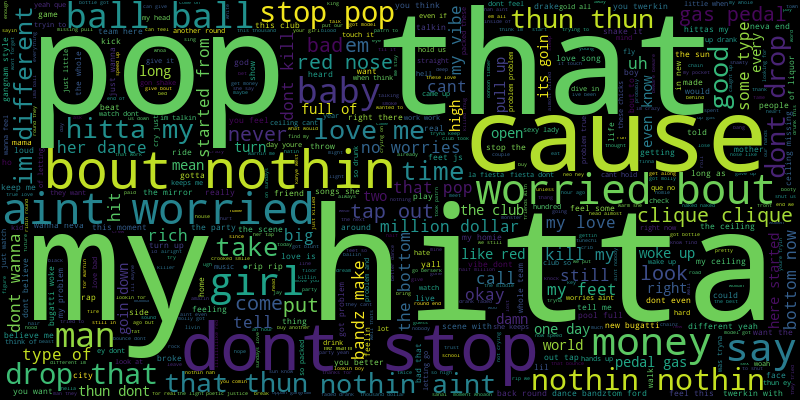

In [73]:
year = 2013
tokens = clean_df['lyrics'][clean_df['year'] == year].apply(lambda x: " ".join([i.strip() for i in x if i]))
tokens = list(map(lambda x: (match_dummies(x, False).split()), tokens))

# Join the different processed titles together
long_string = ','.join([",".join(x) for x in tokens])

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3,  width=800, height=400, stopwords=stops)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

#### 2015

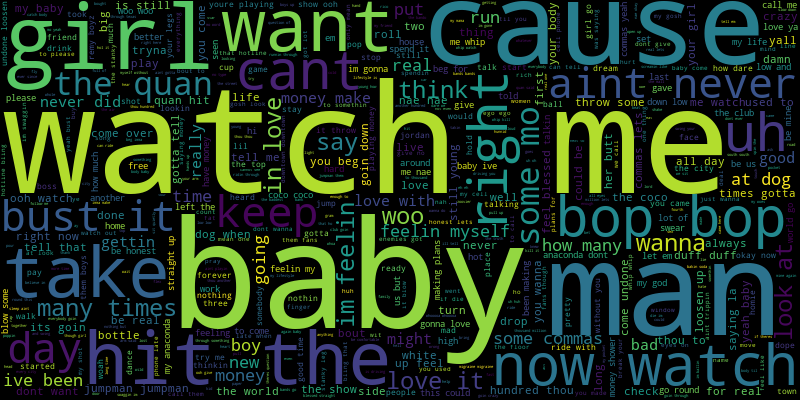

In [74]:
year = 2015
tokens = clean_df['lyrics'][clean_df['year'] == year].apply(lambda x: " ".join([i.strip() for i in x if i]))
tokens = list(map(lambda x: (match_dummies(x, False).split()), tokens))

# Join the different processed titles together
long_string = ','.join([",".join(x) for x in tokens])

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3,  width=800, height=400, stopwords=stops)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

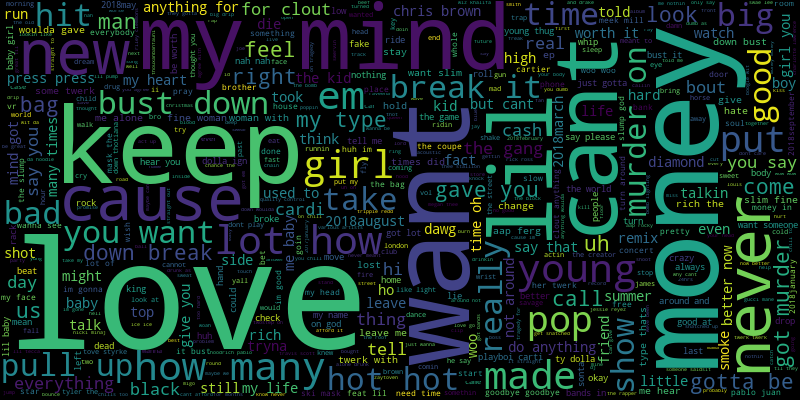

In [76]:
year = 2019
tokens = clean_df['lyrics'][clean_df['year'] == year].apply(lambda x: " ".join([i.strip() for i in x if i]))
tokens = list(map(lambda x: (match_dummies(x, False).split()), tokens))

# Join the different processed titles together
long_string = ','.join([",".join(x) for x in tokens])

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3,  width=800, height=400, stopwords=stops)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# TF-IDF Post Cleaning

In [78]:
tf_vectorizer = TfidfVectorizer()
vec = tf_vectorizer.fit_transform([" ".join([x for x in set_ if x not in stops]) for set_ in clean_stop_tokens])
vector_df_tf = pd.DataFrame(vec.toarray().transpose(),
                         index=tf_vectorizer.get_feature_names())
vector_df_tf

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zucker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuehlsdofrff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(vec)

# print(sorted(count_vectorizer.vocabulary_))
# print(count_data.todense())

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [85]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, tf_vectorizer, number_words)

Topics found via LDA:

Topic #0:
thang timber thun yah beg ay woes fry stir caroline whoaohoh ego twistin oohooh ceiling missing cartier keef job migraine

Topic #1:
quan pedal swaggin saucin bounce kanye wes gas ballin west sheck ohehohohoh ehoh ohohohohwoah bro ali killed spendin maman iverson

Topic #2:
dog woulda songs boyz remind everyday remy thot warnin zoowap thanks crack cookin rest skrr holy meant warm 100 deal

Topic #3:
juju clique clout tiimmy snatched woke bugatti thug fiesta justice poetic leggo nae que mill gunna drrt ross careful lelelet

Topic #4:
bandz mo drank goodbye goosebumps bye fleek ridin dive bestie tags saying huntin awesome spin liquor bedroom hitec chicks goodbyes

Topic #5:
wicked maybe making plans freaked gold mirror mypyt saying chill iggin someday small swervin agree weve tragedy rank surface person

Topic #6:
hitta hol hittas moment stoner twerk gun dna ladada bound 12345678 bouncin account ford slowly rode tom ow muh reason

Topic #7:
saying 24 rake